In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
    import geopandas as gpd
    import shapefile
    from osgeo import ogr,osr,gdal
except:
    !pip install geopandas
    !pip install PyShp
    !pip install gdal
import geopandas as gpd
import shapefile
import numpy as np
import pandas as pd
import xarray as xr
import os
import time
from osgeo import ogr,osr,gdal
import tensorflow as tf
import io
import ee, folium

In [ ]:
!ls drive/MyDrive/long_ndui/long_dmsp_11_cities.csv

drive/MyDrive/long_ndui/long_dmsp_11_cities.csv


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# file = pd.read_csv(io.BytesIO(uploaded['long_dmsp_11_cities.csv']))
# file
file = pd.read_csv('/content/drive/MyDrive/long_ndui/long_dmsp_11_cities.csv')
file

Name      lat       lon
0     albuquerque  35.0844 -106.6504
1          austin  30.2672  -97.7431
2        columbus  39.9612  -82.9988
3          denver  39.7392 -104.9903
4     kansas_city  39.0997  -94.5786
5       Las_Vegas  36.1716 -115.1391
6      louisville  38.2527  -85.7585
7     minneapolis  44.9778  -93.2650
8        portland  45.5152 -122.6784
9         seattle  47.6061 -122.3328
10  washington_DC  38.9072  -77.0369

In [ ]:
!ls /content/drive/MyDrive/long_ndui/

 albuquerque		'Copy of best_model_swinir.pth'   la			    minneapolis
 austin			 denver				  Las_Vegas		    portland
 best_model_swinir.pth	 ds_dmsp_1992_2023_austin.nc	  long_dmsp_11_cities.csv   seattle
 best_weight		 ds_dmsp_1992_2023_LasVegas.nc	  long_dmsp_9_cities.csv    washington_DC
 columbus		 kansas_city			  louisville


In [ ]:
!nvidia-smi

Sun Sep 29 07:05:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
city_name=[]
for i in range(len(file.Name)):
  city = str(file.Name[i])
  city_name.append(city)
city_name

['albuquerque',
 'austin',
 'columbus',
 'denver',
 'kansas_city',
 'Las_Vegas',
 'louisville',
 'minneapolis',
 'portland',
 'seattle',
 'washington_DC']

In [ ]:
for i in range(3,11):
  print(city_name[i])

denver
kansas_city
Las_Vegas
louisville
minneapolis
portland
seattle
washington_DC


In [ ]:
city_path =[]
for i in range(len(city_name)):
  path = '/content/drive/MyDrive/long_ndui/'+str(city_name[i])
  city_path.append(path)
city_path

['/content/drive/MyDrive/long_ndui/albuquerque',
 '/content/drive/MyDrive/long_ndui/austin',
 '/content/drive/MyDrive/long_ndui/columbus',
 '/content/drive/MyDrive/long_ndui/denver',
 '/content/drive/MyDrive/long_ndui/kansas_city',
 '/content/drive/MyDrive/long_ndui/Las_Vegas',
 '/content/drive/MyDrive/long_ndui/louisville',
 '/content/drive/MyDrive/long_ndui/minneapolis',
 '/content/drive/MyDrive/long_ndui/portland',
 '/content/drive/MyDrive/long_ndui/seattle',
 '/content/drive/MyDrive/long_ndui/washington_DC']

In [ ]:
dmsp_swinIR_city = []
for i in range(len(city_name)):
  dmsp_c = xr.open_dataset(str(city_path[i])+'/dmsp_swinIR_1992_2022_'+str(city_name[i]+'.nc'))
  dmsp_swinIR_city.append(dmsp_c)
dmsp_swinIR_city[0]

<xarray.Dataset> Size: 89MB
Dimensions:  (lat: 600, lon: 600, time: 31)
Coordinates:
  * lat      (lat) float64 5kB 37.61 37.6 37.6 37.59 ... 32.65 32.64 32.63 32.62
  * lon      (lon) float64 5kB -109.1 -109.1 -109.1 ... -104.2 -104.2 -104.2
  * time     (time) datetime64[ns] 248B 1992-01-01 1993-01-01 ... 2022-01-01
Data variables:
    dmsp     (time, lat, lon) float64 89MB ...

In [ ]:
dmsp_swinIR_city[1]

<xarray.Dataset> Size: 89MB
Dimensions:  (lat: 600, lon: 600, time: 31)
Coordinates:
  * lat      (lat) float64 5kB 32.8 32.79 32.78 32.77 ... 27.83 27.82 27.81 27.8
  * lon      (lon) float64 5kB -100.2 -100.2 -100.2 ... -95.27 -95.26 -95.25
  * time     (time) datetime64[ns] 248B 1992-01-01 1993-01-01 ... 2022-01-01
Data variables:
    dmsp     (time, lat, lon) float64 89MB ...

In [ ]:
import ee, folium

import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=ofRrt4k1tqe3s_yPfcYowplpv7Xg7KUdfSNSbVEWQiM&tc=fTjN_QZxofPN5jgZCE-PWGG_FbEqTRnwzwQrvtjFKMI&cc=-eLiVfcVMDOoELJg3zacU2fKQK8yq0PnaUXsPFdx0bc

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXkiFURBgKaBQ0-n6smRv-PNV1WZ4ZISe92eYOCB5xFvwqw_S8WLIoc

Successfully saved authorization token.


In [ ]:
!pip install wxee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
aoi_city = []
for i in range(len(file.lat)):
  lats, late = file.lat[i]-0.20, file.lat[i]+0.20
  lons, lone = file.lon[i]-0.20, file.lon[i]+0.20
  aoi = ee.Geometry.Polygon(
        [[[lons, lats],
          [lone, lats],
          [lone, late],
          [lons, late]]])
  aoi_city.append(aoi)
aoi_city[2]

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -83.1988,
              39.761199999999995
            ],
            [
              -82.7988,
              39.761199999999995
            ],
            [
              -82.7988,
              40.1612
            ],
            [
              -83.1988,
              40.1612
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [ ]:
coords = aoi_city[0].coordinates().getInfo()[0]
coords

[[-106.85040000000001, 34.8844],
 [-106.4504, 34.8844],
 [-106.4504, 35.284400000000005],
 [-106.85040000000001, 35.284400000000005],
 [-106.85040000000001, 34.8844]]

In [ ]:
import ee
import wxee
wxee.Initialize()

# Long term NDUI

In [ ]:
# print(city_name[i])
# ndui_c_ = []
# for year_ in range(1999,2023):
#   print(year_)
#   year = str(year_)#'1999'
#     # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
#     # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
#   if year_ == 1999:
#     L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-08-31', str(year_+2)+'-12-31')
#     print(year_)
#     print(str(year_)+'-01-01', str(year_+2)+'-12-31')
#   elif year_ == 2000:
#     L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-08-31', str(year_+1)+'-12-31')
#     print(year_)
#     print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
#   else:
#     L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-08-31', str(year_)+'-12-31')
#     print(year_)
#     print(str(year_-2)+'-01-01', str(year_)+'-12-31')

year_ = 2008
L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-08-01', str(year_)+'-12-31')

def fun4(img):
  bad1 = img.select('B1').eq(0.0)
  bad2 = img.select('B2').eq(0.0)
  bad3 = img.select('B3').eq(0.0)
  bad4 = img.select('B4').eq(0.0)
  bad5 = img.select('B5').eq(0.0)
  bad7 = img.select('B7').eq(0.0)
  mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
  #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
  masked = img.mask(mask);
  ndvi = masked.normalizedDifference(["B4","B3"])
  return ndvi

NDVIs = L7.map(fun4)

Mean_NDVI = NDVIs.median()
Max_NDVI = NDVIs.max()
Min_NDVI = NDVIs.min()
mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

mosaic = mosaic.set('system:time_start', 0)
ds_ndvi_c1999 = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
ds_ndvi_c1999_ = ds_ndvi_c1999.nd.values[0,:,:]
# ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
#   # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
# ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
# ndui_c[ndui_c>1.0] = 1.0
# ndui_c[ndui_c<-1.0] = -1.0
# ndui_c_.append(ndui_c)

HTTPError: ignored

In [ ]:
dv = NDVIs.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)

Requesting data:   0%|          | 0/273521 [00:00<?, ?it/s]

EEException: ignored

In [ ]:
i

0

In [ ]:
ds_ndvi_c

<xarray.Dataset>
Dimensions:      (time: 1, x: 1856, y: 1857)
Coordinates:
  * time         (time) datetime64[ns] 1970-01-01
  * x            (x) float64 -106.9 -106.9 -106.9 ... -106.4 -106.4 -106.4
  * y            (y) float64 35.33 35.33 35.33 35.33 ... 34.84 34.84 34.83 34.83
    spatial_ref  int64 0
Data variables:
    nd           (time, y, x) float32 0.08899 0.09325 0.09325 ... 0.5665 0.5665
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
ds_ndvi_c1

<xarray.Dataset>
Dimensions:      (time: 1, x: 1856, y: 1857)
Coordinates:
  * time         (time) datetime64[ns] 1970-01-01
  * x            (x) float64 -106.9 -106.9 -106.9 ... -106.4 -106.4 -106.4
  * y            (y) float64 35.33 35.33 35.33 35.33 ... 34.84 34.84 34.83 34.83
    spatial_ref  int64 0
Data variables:
    nd           (time, y, x) float32 0.07686 0.08266 0.08266 ... 0.5665 0.5665
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

# Albuquerque

In [ ]:
# ndui_1999_2022_albuquerque
dates = pd.date_range('1999', '2022', freq='YS')

i = 0
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_albuquerque_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_albuquerque_1999_2022

albuquerque
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/6.15M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/6.15M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/6.15M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


Downloading:   0%|          | 0.00/6.10M [00:00<?, ?iB/s]

2003
2003
2001-01-01 2003-12-31


Downloading:   0%|          | 0.00/6.12M [00:00<?, ?iB/s]

2004
2004
2002-01-01 2004-12-31


Downloading:   0%|          | 0.00/6.14M [00:00<?, ?iB/s]

2005
2005
2003-01-01 2005-12-31


Downloading:   0%|          | 0.00/6.18M [00:00<?, ?iB/s]

2006
2006
2004-01-01 2006-12-31


Downloading:   0%|          | 0.00/5.99M [00:00<?, ?iB/s]

2007
2007
2005-01-01 2007-12-31


Downloading:   0%|          | 0.00/5.99M [00:00<?, ?iB/s]

2008
2008
2006-01-01 2008-12-31


Downloading:   0%|          | 0.00/5.98M [00:00<?, ?iB/s]

2009
2009
2007-01-01 2009-12-31


Downloading:   0%|          | 0.00/6.17M [00:00<?, ?iB/s]

2010
2010
2008-01-01 2010-12-31


Downloading:   0%|          | 0.00/6.16M [00:00<?, ?iB/s]

2011
2011
2009-01-01 2011-12-31


Downloading:   0%|          | 0.00/6.15M [00:00<?, ?iB/s]

2012
2012
2010-01-01 2012-12-31


Downloading:   0%|          | 0.00/6.15M [00:00<?, ?iB/s]

2013
2013
2011-01-01 2013-12-31


Downloading:   0%|          | 0.00/6.13M [00:00<?, ?iB/s]

2014
2014
2012-01-01 2014-12-31


Downloading:   0%|          | 0.00/6.14M [00:00<?, ?iB/s]

2015
2015
2013-01-01 2015-12-31


Downloading:   0%|          | 0.00/6.14M [00:00<?, ?iB/s]

2016
2016
2014-01-01 2016-12-31


Downloading:   0%|          | 0.00/6.16M [00:00<?, ?iB/s]

2017
2017
2015-01-01 2017-12-31


Downloading:   0%|          | 0.00/6.17M [00:00<?, ?iB/s]

2018
2018
2016-01-01 2018-12-31


Downloading:   0%|          | 0.00/6.17M [00:00<?, ?iB/s]

2019
2019
2017-01-01 2019-12-31


Downloading:   0%|          | 0.00/6.17M [00:00<?, ?iB/s]

2020
2020
2018-01-01 2020-12-31


Downloading:   0%|          | 0.00/6.17M [00:00<?, ?iB/s]

2021
2021
2019-01-01 2021-12-31


Downloading:   0%|          | 0.00/6.15M [00:00<?, ?iB/s]

2022
2022
2020-01-01 2022-12-31


Downloading:   0%|          | 0.00/6.10M [00:00<?, ?iB/s]

24
(24, 1486, 1485)


<xarray.Dataset>
Dimensions:  (time: 24, lat: 1486, lon: 1485)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 2000-01-01 ... 2022-01-01
  * lat      (lat) float64 35.28 35.28 35.28 35.28 ... 34.89 34.88 34.88 34.88
  * lon      (lon) float64 -106.9 -106.9 -106.8 -106.8 ... -106.5 -106.5 -106.5
Data variables:
    ndui     (time, lat, lon) float64 -0.4569 -0.4566 ... -0.02792 -0.009158

In [ ]:
!ls /content/drive/MyDrive/long_ndui/albuquerque/

dmsp_swinIR_1992_2022_albuquerque.nc


In [ ]:
ds_ndui_albuquerque_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/albuquerque/ndui_albuquerque_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/albuquerque/

dmsp_swinIR_1992_2022_albuquerque.nc  ndui_albuquerque_1999_2022.nc


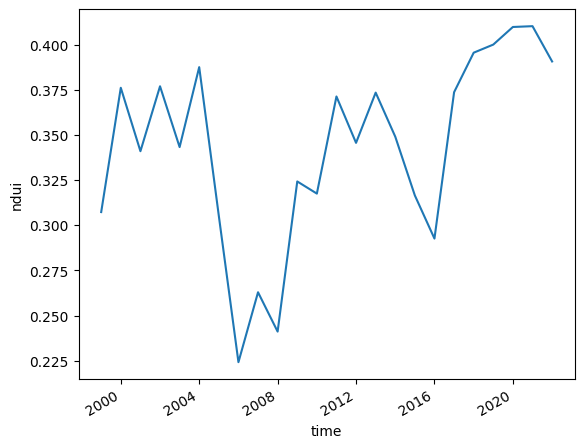

In [ ]:
ds_ndui_albuquerque_1999_2022.mean(dim=['lat','lon']).ndui.plot()

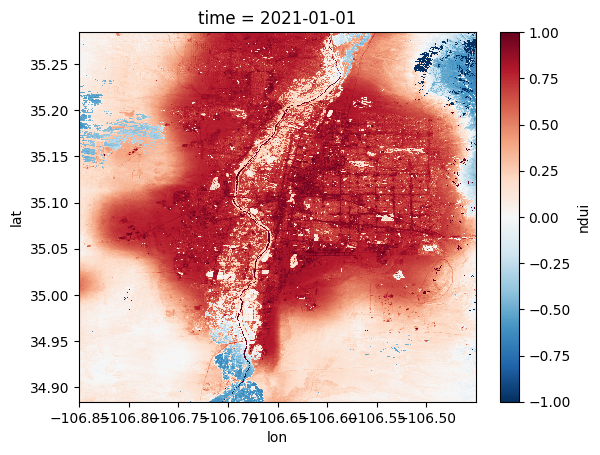

In [ ]:
ds_ndui_albuquerque_1999_2022.isel(time=22).ndui.plot()

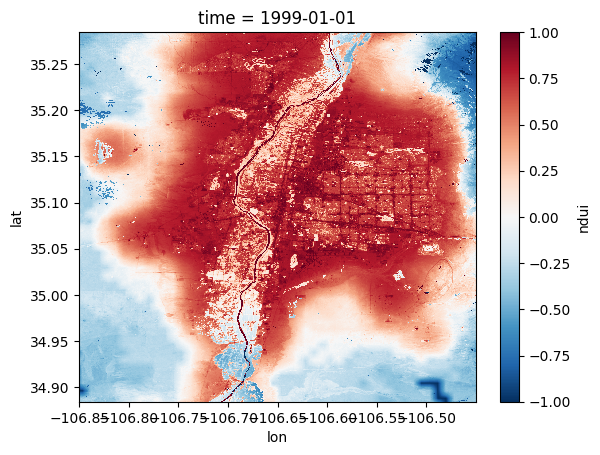

In [ ]:
ds_ndui_albuquerque_1999_2022.isel(time=0).ndui.plot()

In [ ]:
!ls

drive  long_dmsp_11_cities.csv	sample_data


In [ ]:
import xarray as xr

# Austin

# Columbus

# Denver

In [ ]:
# ndui_1999_2022_denver
dates = pd.date_range('1999', '2022', freq='YS')

i = 3
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_denver_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_denver_1999_2022

denver
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/5.63M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/5.63M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/5.63M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


Downloading:   0%|          | 0.00/5.64M [00:00<?, ?iB/s]

2003
2003
2001-01-01 2003-12-31


Downloading:   0%|          | 0.00/5.63M [00:00<?, ?iB/s]

2004
2004
2002-01-01 2004-12-31


HTTPError: ignored

In [ ]:
!ls /content/drive/MyDrive/long_ndui/denver/

In [ ]:
ds_ndui_denver_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/denver/ndui_denver_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/denver/

# Kansas city

In [ ]:
# ndui_1999_2022_kanas_city=[]
dates = pd.date_range('1999', '2022', freq='YS')

i = 4
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_kanas_city_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_kanas_city_1999_2022

kansas_city
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/8.22M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/8.22M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/8.22M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


Downloading:   0%|          | 0.00/8.28M [00:00<?, ?iB/s]

2003
2003
2001-01-01 2003-12-31


Downloading:   0%|          | 0.00/8.24M [00:00<?, ?iB/s]

2004
2004
2002-01-01 2004-12-31


Downloading:   0%|          | 0.00/8.25M [00:00<?, ?iB/s]

2005
2005
2003-01-01 2005-12-31


Downloading:   0%|          | 0.00/8.26M [00:00<?, ?iB/s]

2006
2006
2004-01-01 2006-12-31


Downloading:   0%|          | 0.00/8.36M [00:00<?, ?iB/s]

2007
2007
2005-01-01 2007-12-31


Downloading:   0%|          | 0.00/8.33M [00:00<?, ?iB/s]

2008
2008
2006-01-01 2008-12-31


Downloading:   0%|          | 0.00/8.32M [00:00<?, ?iB/s]

2009
2009
2007-01-01 2009-12-31


Downloading:   0%|          | 0.00/8.33M [00:00<?, ?iB/s]

2010
2010
2008-01-01 2010-12-31


Downloading:   0%|          | 0.00/8.39M [00:00<?, ?iB/s]

2011
2011
2009-01-01 2011-12-31


Downloading:   0%|          | 0.00/8.40M [00:00<?, ?iB/s]

2012
2012
2010-01-01 2012-12-31


Downloading:   0%|          | 0.00/8.35M [00:00<?, ?iB/s]

2013
2013
2011-01-01 2013-12-31


Downloading:   0%|          | 0.00/8.28M [00:00<?, ?iB/s]

2014
2014
2012-01-01 2014-12-31


Downloading:   0%|          | 0.00/8.29M [00:00<?, ?iB/s]

2015
2015
2013-01-01 2015-12-31


Downloading:   0%|          | 0.00/8.36M [00:00<?, ?iB/s]

2016
2016
2014-01-01 2016-12-31


Downloading:   0%|          | 0.00/8.38M [00:00<?, ?iB/s]

2017
2017
2015-01-01 2017-12-31


Downloading:   0%|          | 0.00/8.48M [00:00<?, ?iB/s]

2018
2018
2016-01-01 2018-12-31


Downloading:   0%|          | 0.00/8.45M [00:00<?, ?iB/s]

2019
2019
2017-01-01 2019-12-31


Downloading:   0%|          | 0.00/8.45M [00:00<?, ?iB/s]

2020
2020
2018-01-01 2020-12-31


Downloading:   0%|          | 0.00/8.35M [00:00<?, ?iB/s]

2021
2021
2019-01-01 2021-12-31


Downloading:   0%|          | 0.00/8.34M [00:00<?, ?iB/s]

2022
2022
2020-01-01 2022-12-31


Downloading:   0%|          | 0.00/8.21M [00:00<?, ?iB/s]

24
(24, 1857, 1856)


<xarray.Dataset>
Dimensions:  (time: 24, lat: 1857, lon: 1856)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 2000-01-01 ... 2022-01-01
  * lat      (lat) float64 39.35 39.35 39.35 39.35 ... 38.85 38.85 38.85 38.85
  * lon      (lon) float64 -94.83 -94.83 -94.83 -94.83 ... -94.33 -94.33 -94.33
Data variables:
    ndui     (time, lat, lon) float64 -0.7167 -0.7161 ... -0.3194 -0.3245

In [ ]:
!ls /content/drive/MyDrive/long_ndui/kansas_city/

best_model_kansas_city.pth	dmsp_swinIR_1992_2022_kansas_city.nc
dmsp_2012_1992_kansas_city.nc	ds_viirs_2012_kansas_city.nc
dmsp_2012_kansas_city.nc	viirs_interp_2012_kansas_city.nc
dmsp_2013_2022_kansas_city_.nc


In [ ]:
ds_ndui_kanas_city_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/kansas_city/ndui_kansas_city_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/kansas_city/

best_model_kansas_city.pth	dmsp_swinIR_1992_2022_kansas_city.nc
dmsp_2012_1992_kansas_city.nc	ds_viirs_2012_kansas_city.nc
dmsp_2012_kansas_city.nc	ndui_kansas_city_1999_2022.nc
dmsp_2013_2022_kansas_city_.nc	viirs_interp_2012_kansas_city.nc


# Las_Vegas

In [ ]:
# ndui_1999_2022_Las_Vegas
dates = pd.date_range('1999', '2022', freq='YS')

i = 5
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_Las_Vegas_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_Las_Vegas_1999_2022

Las_Vegas
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/9.48M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/9.48M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/9.48M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


Downloading:   0%|          | 0.00/9.43M [00:00<?, ?iB/s]

2003
2003
2001-01-01 2003-12-31


Downloading:   0%|          | 0.00/9.33M [00:00<?, ?iB/s]

2004
2004
2002-01-01 2004-12-31


Downloading:   0%|          | 0.00/9.30M [00:00<?, ?iB/s]

2005
2005
2003-01-01 2005-12-31


Downloading:   0%|          | 0.00/9.25M [00:00<?, ?iB/s]

2006
2006
2004-01-01 2006-12-31


Downloading:   0%|          | 0.00/9.35M [00:00<?, ?iB/s]

2007
2007
2005-01-01 2007-12-31


Downloading:   0%|          | 0.00/9.39M [00:00<?, ?iB/s]

2008
2008
2006-01-01 2008-12-31


Downloading:   0%|          | 0.00/9.41M [00:00<?, ?iB/s]

2009
2009
2007-01-01 2009-12-31


Downloading:   0%|          | 0.00/9.42M [00:00<?, ?iB/s]

2010
2010
2008-01-01 2010-12-31


Downloading:   0%|          | 0.00/9.41M [00:00<?, ?iB/s]

2011
2011
2009-01-01 2011-12-31


Downloading:   0%|          | 0.00/9.42M [00:00<?, ?iB/s]

2012
2012
2010-01-01 2012-12-31


Downloading:   0%|          | 0.00/9.40M [00:00<?, ?iB/s]

2013
2013
2011-01-01 2013-12-31


Downloading:   0%|          | 0.00/9.41M [00:00<?, ?iB/s]

2014
2014
2012-01-01 2014-12-31


Downloading:   0%|          | 0.00/9.41M [00:00<?, ?iB/s]

2015
2015
2013-01-01 2015-12-31


Downloading:   0%|          | 0.00/9.41M [00:00<?, ?iB/s]

2016
2016
2014-01-01 2016-12-31


Downloading:   0%|          | 0.00/9.45M [00:00<?, ?iB/s]

2017
2017
2015-01-01 2017-12-31


Downloading:   0%|          | 0.00/9.44M [00:00<?, ?iB/s]

2018
2018
2016-01-01 2018-12-31


Downloading:   0%|          | 0.00/9.45M [00:00<?, ?iB/s]

2019
2019
2017-01-01 2019-12-31


Downloading:   0%|          | 0.00/9.43M [00:00<?, ?iB/s]

2020
2020
2018-01-01 2020-12-31


Downloading:   0%|          | 0.00/9.44M [00:00<?, ?iB/s]

2021
2021
2019-01-01 2021-12-31


Downloading:   0%|          | 0.00/9.44M [00:00<?, ?iB/s]

2022
2022
2020-01-01 2022-12-31


Downloading:   0%|          | 0.00/9.93M [00:00<?, ?iB/s]

24
(24, 1857, 1856)


<xarray.Dataset>
Dimensions:  (time: 24, lat: 1857, lon: 1856)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 2000-01-01 ... 2022-01-01
  * lat      (lat) float64 36.42 36.42 36.42 36.42 ... 35.92 35.92 35.92 35.92
  * lon      (lon) float64 -115.4 -115.4 -115.4 -115.4 ... -114.9 -114.9 -114.9
Data variables:
    ndui     (time, lat, lon) float64 -0.1786 -0.1786 -0.2063 ... 0.2237 0.2633

In [ ]:
!ls /content/drive/MyDrive/long_ndui/Las_Vegas/

dmsp_swinIR_1992_2022_Las_Vegas.nc


In [ ]:
ds_ndui_Las_Vegas_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/Las_Vegas/ndui_Las_Vegas_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/Las_Vegas/

dmsp_swinIR_1992_2022_Las_Vegas.nc  ndui_Las_Vegas_1999_2022.nc


# Louisville

In [ ]:
# ndui_1999_2022_louisville
dates = pd.date_range('1999', '2022', freq='YS')

i = 6
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_louisville_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_louisville_1999_2022

louisville
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/5.23M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/5.23M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/5.23M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


HTTPError: ignored

In [ ]:
!ls /content/drive/MyDrive/long_ndui/louisville/

In [ ]:
ds_ndui_louisville_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/louisville/ndui_louisville_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/louisville/

# Minneapolis

In [ ]:
# ndui_1999_2022_minneapolis
dates = pd.date_range('1999', '2022', freq='YS')

i = 7
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7_ = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_minneapolis_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_minneapolis_1999_2022

minneapolis
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.49M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.49M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.49M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


Downloading:   0%|          | 0.00/7.51M [00:00<?, ?iB/s]

2003
2003
2001-01-01 2003-12-31


Downloading:   0%|          | 0.00/7.45M [00:00<?, ?iB/s]

2004
2004
2002-01-01 2004-12-31


Downloading:   0%|          | 0.00/7.54M [00:00<?, ?iB/s]

2005
2005
2003-01-01 2005-12-31


Downloading:   0%|          | 0.00/7.48M [00:00<?, ?iB/s]

2006
2006
2004-01-01 2006-12-31


Downloading:   0%|          | 0.00/7.63M [00:00<?, ?iB/s]

2007
2007
2005-01-01 2007-12-31


Downloading:   0%|          | 0.00/7.61M [00:00<?, ?iB/s]

2008
2008
2006-01-01 2008-12-31


Downloading:   0%|          | 0.00/7.75M [00:00<?, ?iB/s]

2009
2009
2007-01-01 2009-12-31


Downloading:   0%|          | 0.00/7.83M [00:00<?, ?iB/s]

2010
2010
2008-01-01 2010-12-31


Downloading:   0%|          | 0.00/7.54M [00:00<?, ?iB/s]

2011
2011
2009-01-01 2011-12-31


Downloading:   0%|          | 0.00/7.48M [00:00<?, ?iB/s]

2012
2012
2010-01-01 2012-12-31


Downloading:   0%|          | 0.00/7.43M [00:00<?, ?iB/s]

2013
2013
2011-01-01 2013-12-31


Downloading:   0%|          | 0.00/7.36M [00:00<?, ?iB/s]

2014
2014
2012-01-01 2014-12-31


HTTPError: ignored

In [ ]:
!ls /content/drive/MyDrive/long_ndui/minneapolis/

In [ ]:
ds_ndui_minneapolis_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/minneapolis/ndui_minneapolis_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/minneapolis/

# Portland

In [ ]:
# ndui_1999_2022_portland
## Downloaded at 0.20x0.20 buffer

dates = pd.date_range('1999', '2022', freq='YS')

i = 8
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_portland_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_portland_1999_2022

portland
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.53M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.53M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.53M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


HTTPError: ignored

In [ ]:
!ls /content/drive/MyDrive/long_ndui/portland/

best_model_minneapolis.pth	dmsp_swinIR_1992_2022_minneapolis.nc
dmsp_2012_1992_minneapolis.nc	ds_viirs_2012_minneapolis.nc
dmsp_2012_minneapolis.nc	viirs_interp_2012_minneapolis.nc
dmsp_2013_2022_minneapolis_.nc


In [ ]:
ds_ndui_portland_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/portland/ndui_portland_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/portland/

# Seattle

In [ ]:
# ndui_1999_2022_seattle
dates = pd.date_range('1999', '2022', freq='YS')

i = 9
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_seattle_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_seattle_1999_2022

seattle
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/6.57M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/6.57M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/6.57M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


Downloading:   0%|          | 0.00/6.62M [00:00<?, ?iB/s]

2003
2003
2001-01-01 2003-12-31


Downloading:   0%|          | 0.00/6.64M [00:00<?, ?iB/s]

2004
2004
2002-01-01 2004-12-31


Downloading:   0%|          | 0.00/6.61M [00:00<?, ?iB/s]

2005
2005
2003-01-01 2005-12-31


Downloading:   0%|          | 0.00/6.61M [00:00<?, ?iB/s]

2006
2006
2004-01-01 2006-12-31


Downloading:   0%|          | 0.00/6.68M [00:00<?, ?iB/s]

2007
2007
2005-01-01 2007-12-31


Downloading:   0%|          | 0.00/6.71M [00:00<?, ?iB/s]

2008
2008
2006-01-01 2008-12-31


Downloading:   0%|          | 0.00/6.71M [00:00<?, ?iB/s]

2009
2009
2007-01-01 2009-12-31


Downloading:   0%|          | 0.00/6.68M [00:00<?, ?iB/s]

2010
2010
2008-01-01 2010-12-31


Downloading:   0%|          | 0.00/6.64M [00:00<?, ?iB/s]

2011
2011
2009-01-01 2011-12-31


Downloading:   0%|          | 0.00/6.54M [00:00<?, ?iB/s]

2012
2012
2010-01-01 2012-12-31


Downloading:   0%|          | 0.00/6.54M [00:00<?, ?iB/s]

2013
2013
2011-01-01 2013-12-31


Downloading:   0%|          | 0.00/6.56M [00:00<?, ?iB/s]

2014
2014
2012-01-01 2014-12-31


Downloading:   0%|          | 0.00/6.61M [00:00<?, ?iB/s]

2015
2015
2013-01-01 2015-12-31


Downloading:   0%|          | 0.00/6.55M [00:00<?, ?iB/s]

2016
2016
2014-01-01 2016-12-31


Downloading:   0%|          | 0.00/6.56M [00:00<?, ?iB/s]

2017
2017
2015-01-01 2017-12-31


Downloading:   0%|          | 0.00/6.65M [00:00<?, ?iB/s]

2018
2018
2016-01-01 2018-12-31


Downloading:   0%|          | 0.00/6.72M [00:00<?, ?iB/s]

2019
2019
2017-01-01 2019-12-31


Downloading:   0%|          | 0.00/6.74M [00:00<?, ?iB/s]

2020
2020
2018-01-01 2020-12-31


Downloading:   0%|          | 0.00/6.60M [00:00<?, ?iB/s]

2021
2021
2019-01-01 2021-12-31


Downloading:   0%|          | 0.00/6.61M [00:00<?, ?iB/s]

2022
2022
2020-01-01 2022-12-31


Downloading:   0%|          | 0.00/6.55M [00:00<?, ?iB/s]

24
(24, 1858, 1856)


<xarray.Dataset>
Dimensions:  (time: 24, lat: 1858, lon: 1856)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 2000-01-01 ... 2022-01-01
  * lat      (lat) float64 47.86 47.86 47.86 47.86 ... 47.36 47.36 47.36 47.36
  * lon      (lon) float64 -122.6 -122.6 -122.6 -122.6 ... -122.1 -122.1 -122.1
Data variables:
    ndui     (time, lat, lon) float64 0.08859 0.09087 ... -0.00216 -0.035

In [ ]:
!ls /content/drive/MyDrive/long_ndui/seattle/

best_model_seattle.pth	    dmsp_swinIR_1992_2022_seattle.nc
dmsp_2012_1992_seattle.nc   ds_viirs_2012_seattle.nc
dmsp_2012_seattle.nc	    viirs_interp_2012_seattle.nc
dmsp_2013_2022_seattle_.nc


In [ ]:
ds_ndui_seattle_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/seattle/ndui_seattle_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/seattle/

best_model_seattle.pth	    dmsp_swinIR_1992_2022_seattle.nc
dmsp_2012_1992_seattle.nc   ds_viirs_2012_seattle.nc
dmsp_2012_seattle.nc	    ndui_seattle_1999_2022.nc
dmsp_2013_2022_seattle_.nc  viirs_interp_2012_seattle.nc


# Washington_DC

In [ ]:
# ndui_1999_2022_washington_DC
dates = pd.date_range('1999', '2022', freq='YS')

i = 10
print(city_name[i])
ndui_c_ = []
for year_ in range(1999,2023):
  print(year_)
  year = str(year_)#'1999'
    # ds_dmsp_interp = ds_dmsp.sel(time=slice(year, year)).interp(lon=ds_ndvi.x, lat=ds_ndvi.y).dmsp.values[0,:,:]/63.0
    # L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate(year+'-01-01', year+'-12-31')
  if year_ == 1999:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_)+'-01-01', str(year_+2)+'-12-31')
    print(year_)
    print(str(year_)+'-01-01', str(year_+2)+'-12-31')
  elif year_ == 2000:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
    print(year_)
    print(str(year_-1)+'-01-01', str(year_+1)+'-12-31')
  else:
    L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(str(year_-2)+'-01-01', str(year_)+'-12-31')
    print(year_)
    print(str(year_-2)+'-01-01', str(year_)+'-12-31')

  def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

  NDVIs = L7.map(fun4)

  Mean_NDVI = NDVIs.median()
  Max_NDVI = NDVIs.max()
  Min_NDVI = NDVIs.min()
  mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
  mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

  mosaic = mosaic.set('system:time_start', 0)
  ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30)
  ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]
  ds_dmsp_interp_c = dmsp_swinIR_city[i].sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0
  # ds_ndvi_c_ = mosaic.wx.to_xarray(region=aoi_city[i].bounds(), scale=30).nd.values[0,:,:]
  ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
  ndui_c[ndui_c>1.0] = 1.0
  ndui_c[ndui_c<-1.0] = -1.0
  ndui_c_.append(ndui_c)
print(len(ndui_c_))
print(np.stack(ndui_c_).shape)

ndui_c_stack = np.stack(ndui_c_)

ds_ndui_washington_DC_1999_2022 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_c_stack,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
                ),
    },
                                          )

ds_ndui_washington_DC_1999_2022

washington_DC
1999
1999
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.93M [00:00<?, ?iB/s]

2000
2000
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.93M [00:00<?, ?iB/s]

2001
2001
1999-01-01 2001-12-31


Downloading:   0%|          | 0.00/7.93M [00:00<?, ?iB/s]

2002
2002
2000-01-01 2002-12-31


Downloading:   0%|          | 0.00/7.96M [00:00<?, ?iB/s]

2003
2003
2001-01-01 2003-12-31


Downloading:   0%|          | 0.00/7.77M [00:00<?, ?iB/s]

2004
2004
2002-01-01 2004-12-31


Downloading:   0%|          | 0.00/7.76M [00:00<?, ?iB/s]

2005
2005
2003-01-01 2005-12-31


Downloading:   0%|          | 0.00/7.82M [00:00<?, ?iB/s]

2006
2006
2004-01-01 2006-12-31


Downloading:   0%|          | 0.00/7.96M [00:00<?, ?iB/s]

2007
2007
2005-01-01 2007-12-31


Downloading:   0%|          | 0.00/8.06M [00:00<?, ?iB/s]

2008
2008
2006-01-01 2008-12-31


Downloading:   0%|          | 0.00/8.08M [00:00<?, ?iB/s]

2009
2009
2007-01-01 2009-12-31


Downloading:   0%|          | 0.00/7.94M [00:00<?, ?iB/s]

2010
2010
2008-01-01 2010-12-31


Downloading:   0%|          | 0.00/7.94M [00:00<?, ?iB/s]

2011
2011
2009-01-01 2011-12-31


Downloading:   0%|          | 0.00/7.83M [00:00<?, ?iB/s]

2012
2012
2010-01-01 2012-12-31


Downloading:   0%|          | 0.00/7.69M [00:00<?, ?iB/s]

2013
2013
2011-01-01 2013-12-31


Downloading:   0%|          | 0.00/7.82M [00:00<?, ?iB/s]

2014
2014
2012-01-01 2014-12-31


Downloading:   0%|          | 0.00/7.84M [00:00<?, ?iB/s]

2015
2015
2013-01-01 2015-12-31


Downloading:   0%|          | 0.00/7.99M [00:00<?, ?iB/s]

2016
2016
2014-01-01 2016-12-31


Downloading:   0%|          | 0.00/7.96M [00:00<?, ?iB/s]

2017
2017
2015-01-01 2017-12-31


Downloading:   0%|          | 0.00/8.22M [00:00<?, ?iB/s]

2018
2018
2016-01-01 2018-12-31


Downloading:   0%|          | 0.00/8.13M [00:00<?, ?iB/s]

2019
2019
2017-01-01 2019-12-31


Downloading:   0%|          | 0.00/8.07M [00:00<?, ?iB/s]

2020
2020
2018-01-01 2020-12-31


Downloading:   0%|          | 0.00/7.87M [00:00<?, ?iB/s]

2021
2021
2019-01-01 2021-12-31


Downloading:   0%|          | 0.00/7.91M [00:00<?, ?iB/s]

2022
2022
2020-01-01 2022-12-31


Downloading:   0%|          | 0.00/8.21M [00:00<?, ?iB/s]

24
(24, 1857, 1856)


<xarray.Dataset>
Dimensions:  (time: 24, lat: 1857, lon: 1856)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 2000-01-01 ... 2022-01-01
  * lat      (lat) float64 39.16 39.16 39.16 39.16 ... 38.66 38.66 38.66 38.66
  * lon      (lon) float64 -77.29 -77.29 -77.29 -77.29 ... -76.79 -76.79 -76.79
Data variables:
    ndui     (time, lat, lon) float64 0.7039 0.4055 0.3705 ... -0.4595 -0.4598

In [ ]:
!ls /content/drive/MyDrive/long_ndui/washington_DC/

best_model_washington_DC.pth	  dmsp_swinIR_1992_2022_washington_DC.nc
dmsp_2012_1992_washington_DC.nc   ds_viirs_2012_washington_DC.nc
dmsp_2012_washington_DC.nc	  viirs_interp_2012_washington_DC.nc
dmsp_2013_2022_washington_DC_.nc


In [ ]:
ds_ndui_washington_DC_1999_2022.to_netcdf('/content/drive/MyDrive/long_ndui/washington_DC/ndui_washington_DC_1999_2022.nc')
!ls /content/drive/MyDrive/long_ndui/washington_DC/

best_model_washington_DC.pth	  dmsp_swinIR_1992_2022_washington_DC.nc
dmsp_2012_1992_washington_DC.nc   ds_viirs_2012_washington_DC.nc
dmsp_2012_washington_DC.nc	  ndui_washington_DC_1999_2022.nc
dmsp_2013_2022_washington_DC_.nc  viirs_interp_2012_washington_DC.nc


In [ ]:
# import pandas as pd
# ndui_ = np.stack(ndui_)
dates = pd.date_range('1999', '2022', freq='YS')
dates

DatetimeIndex(['1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [ ]:
ds_ndui_1999_2017 = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time':dates, 'lat': ds_ndvi.y.values, 'lon': ds_ndvi.x.values},

                ),
            },
    )

In [ ]:
ds_ndui_1999_2017

<xarray.Dataset>
Dimensions:  (time: 19, lat: 1857, lon: 1857)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 2000-01-01 ... 2017-01-01
  * lat      (lat) float64 30.52 30.52 30.52 30.52 ... 30.02 30.02 30.02 30.02
  * lon      (lon) float64 -97.99 -97.99 -97.99 -97.99 ... -97.49 -97.49 -97.49
Data variables:
    ndui     (time, lat, lon) float64 -0.7045 -0.7006 ... -0.7124 -0.7093

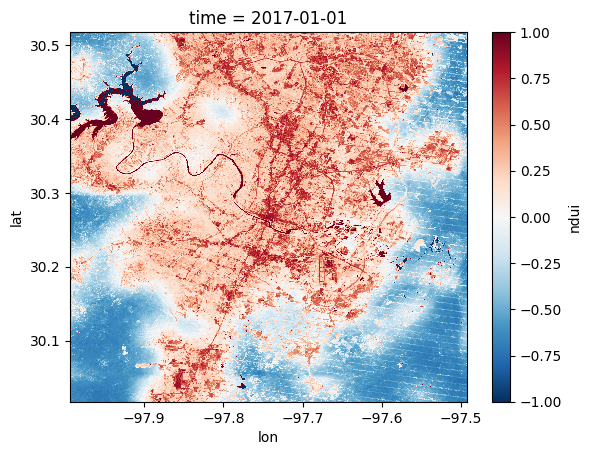

In [ ]:
ds_ndui_1999_2022.ndui.isel(time=-1).plot()

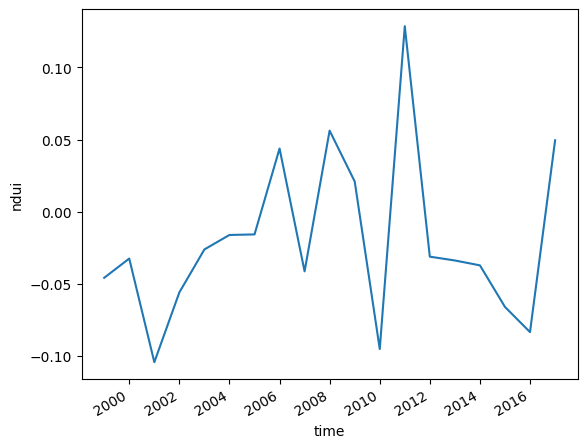

In [ ]:
ds_ndui_1999_2017.ndui.mean(dim='lat').mean(dim='lon').plot()

In [ ]:
ds_ndui_1999_2017.to_netcdf('ndui_austin_1999_2017.nc')
!ls

drive  ndui_austin_1999_2017.nc  ndvi_mosaic_austin.nc	sample_data


In [ ]:
!mv ndui_austin_1999_2017.nc /content/drive/MyDrive/long_ndui/

In [ ]:
import xarray as xr
ds_ndui_1999_2017 = xr.open_dataset('/content/drive/MyDrive/long_ndui/ndui_austin_1999_2017.nc')

<ipython-input-31-316ff9decf55>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[-1,-1].set_xticklabels(labels, rotation=90)


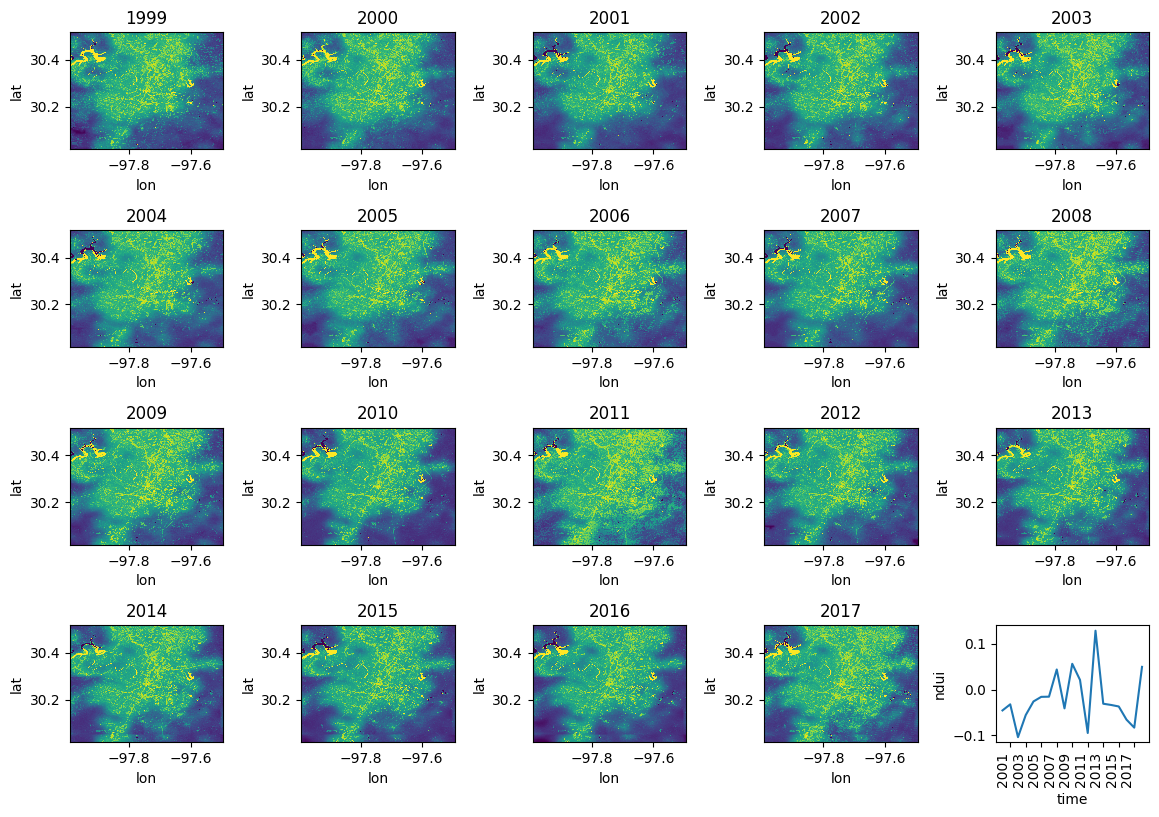

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots(ncols=5,nrows=4, figsize=(11.69,8.27))
cnt=0
years = np.arange(1999,2018)
for i in range(4):
    for j in range(5):
        ds_ndui_1999_2017.ndui.isel(time=cnt).plot(ax=ax[i,j], vmin=-1, vmax=1, add_colorbar = False)
        ax[i,j].set_title(str(years[cnt]))
        cnt = cnt + 1
        if cnt==19:
            break
ds_ndui_1999_2017.ndui.mean(dim='lat').mean(dim='lon').plot(ax=ax[-1,-1])
#ax[-1,-1].set_xticks(rotation=90)
labels = np.arange(1999,2018,2)
ax[-1,-1].set_xticklabels(labels, rotation=90)

#ax[-1,-1].set_visible(False)
plt.tight_layout()
plt.savefig('long_ndui_austin.png', dpi=500)

In [ ]:
!mv long_ndui_austin.png /content/drive/MyDrive/long_ndui/

# Figure 1

In [ ]:
ds_dmsp = xr.open_dataset('/content/drive/MyDrive/long_ndui/dmsp_2012_austin.nc')
ds_viirs = xr.open_dataset('/content/drive/MyDrive/long_ndui/viirs_2012_austin.nc')
ds_ndui = xr.open_dataset('/content/drive/MyDrive/long_ndui/ndui_austin_1999_2017.nc')

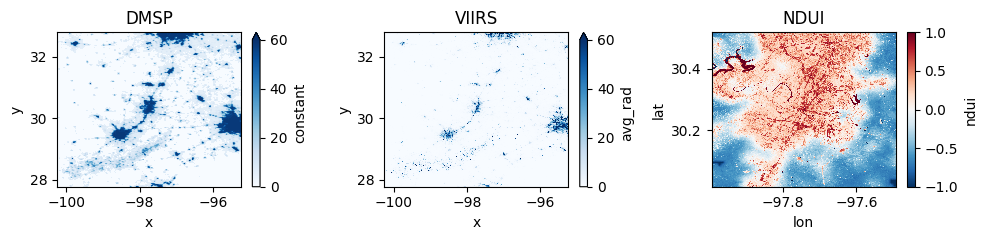

In [ ]:
fig,ax = plt.subplots(ncols=3,nrows=1, figsize=(10,2.5))
ds_dmsp.constant.plot(ax=ax[0], vmin=0, vmax=60, cmap='Blues', extend='max')
ds_viirs.avg_rad.plot(ax=ax[1], vmin=0, vmax=60, cmap='Blues', extend='max')
ds_ndui.ndui.sel(time=slice('2012','2012')).plot(ax=ax[2])
ax[0].set_title('DMSP')
ax[1].set_title('VIIRS')
ax[2].set_title('NDUI')
plt.tight_layout()
plt.savefig('figure1.png', dpi=500)

In [ ]:
!mv figure1.png /content/drive/MyDrive/long_ndui/

# Validation

In [ ]:
dataset_pop = ee.ImageCollection('CIESIN/GPWv411/GPW_Population_Density')

In [ ]:
#dataset_pop = dataset_pop.set('system:time_start', 0)
ds_pop = dataset_pop.wx.to_xarray(region=aoi.bounds(), scale=10000)

Requesting data:   0%|          | 0/5 [00:00<?, ?it/s]

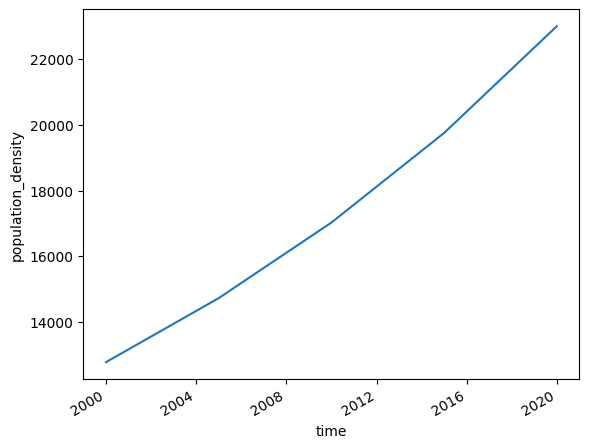

In [ ]:
ds_pop.sum(dim='x').sum(dim='y').population_density.plot()

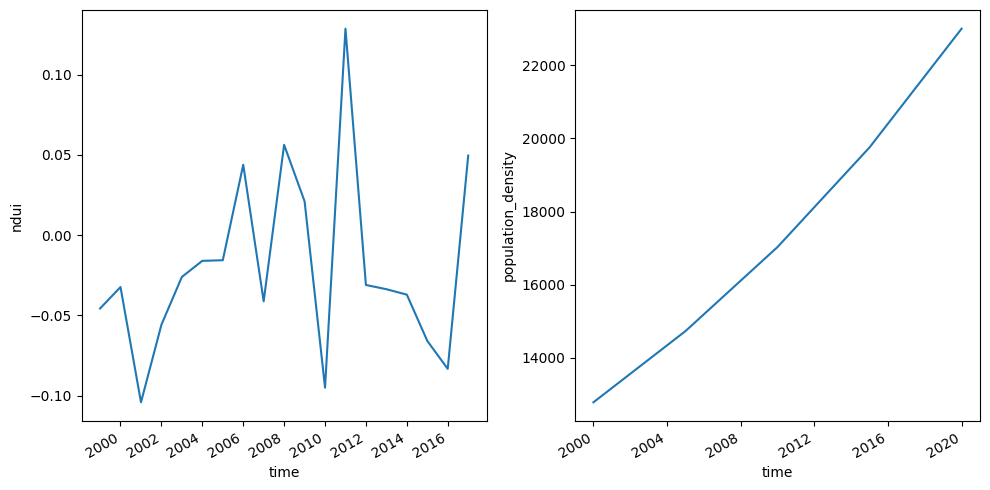

In [ ]:
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5))
ds_ndui_1999_2017.ndui.mean(dim='lat').mean(dim='lon').plot(ax=ax[0])
ds_pop.sum(dim='x').sum(dim='y').population_density.plot(ax=ax[1])
plt.tight_layout()
plt.savefig('validation_population.png', dpi=500)

In [ ]:
ds_pop.to_netcdf('austin_pop.nc')

In [ ]:
!ls

austin_pop.nc  long_ndui_austin.png   sample_data
drive	       ndvi_mosaic_austin.nc  validation_population.png


In [ ]:
!mv austin_pop.nc /content/drive/MyDrive/long_ndui/

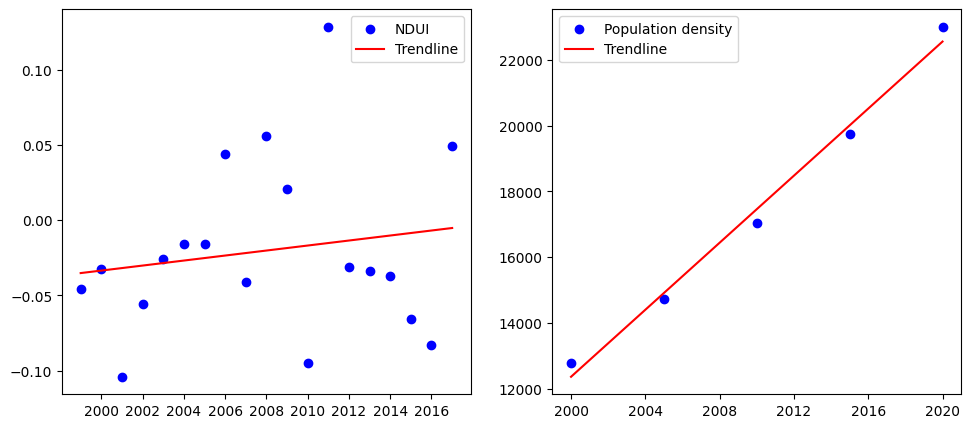

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(11.6,5))

ndui_austin = ds_ndui_1999_2017.ndui.mean(dim='lat').mean(dim='lon').values
time = np.arange(ndui_austin.shape[0]) #ds_ndui_1999_2017.ndui.mean(dim='lat').mean(dim='lon').time.values
m, c = np.polyfit(time, ndui_austin, 1)
y_trendline = m*time + c
ax[0].scatter(ds_ndui_1999_2017.ndui.mean(dim='lat').mean(dim='lon').time.values, ndui_austin, color='b', label='NDUI')
ax[0].plot(ds_ndui_1999_2017.ndui.mean(dim='lat').mean(dim='lon').time.values, y_trendline, color='r', label=f'Trendline')
ax[0].legend()

pop_austin = ds_pop.sum(dim='x').sum(dim='y').population_density.values
time = np.arange(pop_austin.shape[0])
m, c = np.polyfit(time, pop_austin, 1)
y_trendline = m*time + c
ax[1].scatter(ds_pop.sum(dim='x').sum(dim='y').population_density.time.values, pop_austin, color='b', label='Population density')
ax[1].plot(ds_pop.sum(dim='x').sum(dim='y').population_density.time.values, y_trendline, color='r', label=f'Trendline')

for ax in [ax[0], ax[1]]:
    ax.legend()
plt.savefig('validation_pop.png', dpi=500)

In [ ]:
np.arange(ndui_austin.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])